# Báo cáo bài tập phân lớp với tập dữ liệu 1: Titanic Task   
_Nguyễn Đức Minh - Nhóm 04_  
**Tổng quan về dữ liệu:**  
Dữ liệu về các hành khách đã đi trên chuyến tàu Titanic, được chia ra làm 2 file:  
-	File train.csv chứa các dữ liệu đã được dán nhãn ‘Survived’.
-	File test.csv chứa các dữ liệu chưa được dán nhãn.


## Thực hiện phân lớp dữ liệu.

In [1]:
#Import các thư viện cần thiết.
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
#Tạo ra dataframe để chứa dữ liệu train và dữ liệu test.
train_df = pd.read_csv('Titanic Task/train.csv')
test_df = pd.read_csv('Titanic Task/test.csv')
test2_df = pd.read_csv('Titanic Task/test.csv')

#Gộp train_df và test_df vào 1 dataframe
titanic_df = pd.concat([train_df, test_df], sort = False)
len_train = train_df.shape[0]

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1. Chỉnh sửa lại dữ liệu bị mất.  
Trong cả tập dữ liệu train và test có một số dữ liệu bị mất, bị thiếu.

In [3]:
#Số dữ liệu bị thiếu trong tập train
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Số dữ liệu bị thiếu trong tập test
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Chúng ta có thể thấy các dữ liệu bị thiếu là Age, Cabin, Embarked, Fare (ở test_df). Ở phần dưới đây em sẽ tiến hành thay thế các dữ liệu bị thiếu này.
### Dữ liệu Age

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Count')]

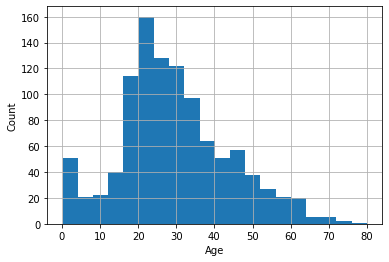

In [35]:
ax = titanic_df["Age"].hist(bins=20)
ax.set(xlabel='Age', ylabel='Count')

Tuổi của các hành khách trên tàu chủ yếu nằm trong khoảng 20-35 tuổi, đồ thị tập trung về bên trái, vì vậy nếu chúng ta thay thế dữ liệu bị thiếu bằng giá trị trung bình có thể khiến kết quả sai. Trong bài tập này, em điền vào những chỗ dữ liệu Age bị thiếu bằng trung vị.

In [6]:
#Dữ liệu Age bị thiếu được thay thế bằng tuổi trung bình
train_df.Age = train_df.Age.fillna(train_df.Age.median())
test_df.Age = test_df.Age.fillna(train_df.Age.median())

### Dữ liệu Fare  


[Text(0.5, 0, 'Fare Price'), Text(0, 0.5, 'Count')]

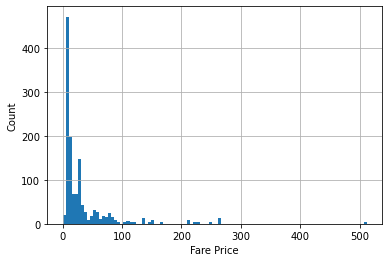

In [7]:
ax = titanic_df["Fare"].hist(bins=100)
ax.set(xlabel='Fare Price', ylabel='Count')

Giá vé tàu chủ yếu có giá nằm trong khoảng từ 0 đến 50 đơn vị, với một cột có nhiều giá trị hơn hẳn các cột khác. Vì vậy, em sẽ điền vào các giá trị bị thiếu giá trị có tần số cao nhất (mode).

In [8]:
train_df.Fare = train_df.Fare.fillna(train_df.Fare.mode())
test_df.Fare = train_df.Fare.fillna(train_df.Fare.mode())

### Dữ liệu Embarked

<AxesSubplot:>

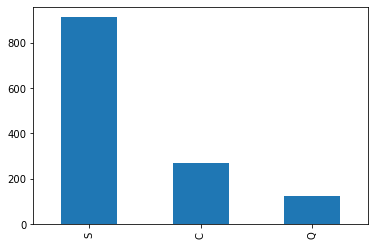

In [30]:
# ax = titanic_df["Embarked"].hist(bins=3)
# ax.set(xlabel='Fare Price', ylabel='Count')
titanic_df['Embarked'].value_counts().plot(kind = 'bar')

Tương tự với Fare, em cũng thay thế dữ liệu Embarked bị thiếu bằng giá trị mode.

In [10]:
#Dữ liệu Embarked bị thiếu được thay thế bằng điểm lên tàu nhiều nhất : S
train_df.Embarked = train_df.Embarked.fillna(train_df.Embarked.mode())
test_df.Embarked = test_df.Embarked.fillna(train_df.Embarked.mode())

### Dữ liệu Cabin  
Bỏ qua .


### Dữ liệu name.
Từ trong tên, chúng ta có thể tách ra được title và dùng nó cho việc phân lớp.

In [11]:
#Tách Title của một người từ Name.
train_df['title']=train_df.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
test_df['title']=test_df.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
train_df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Capt              1
Sir               1
Mme               1
Don               1
Jonkheer          1
the Countess      1
Ms                1
Name: title, dtype: int64

Từ đống title trên, mình thu hẹp lại thành từng mức title khác nhau.

In [12]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}


In [13]:
train_df['title']=train_df['title'].map(newtitles)
test_df['title'] = test_df['title'].map(newtitles)
train_df.title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

In [14]:
# Xoá những cột không cần thiết
train_df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin'],axis=1,inplace=True)
test_df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin'],axis=1,inplace=True)

In [15]:
titanic = pd.concat([train_df, test_df], sort = False)

In [16]:
titanic = pd.get_dummies(titanic)

In [17]:
train_df = titanic[:len_train]
test_df = titanic[len_train:]

In [18]:
# Thay
train_df.Survived=train_df.Survived.astype('int')
train_df.Survived.dtype

D:\anaconda\envs\LabEnv\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('int32')

In [19]:
x_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']
x_test = test_df.drop(['Survived'], axis = 1)
x_train

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,3,22.0,7.2500,0,1,0,0,1,0,0,1,0,0,0
1,1,38.0,71.2833,1,0,1,0,0,0,0,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1,0,1,0,0,0,0
3,1,35.0,53.1000,1,0,0,0,1,0,0,0,1,0,0
4,3,35.0,8.0500,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0,1,0,0,1,0,0,0,0,1,0
887,1,19.0,30.0000,1,0,0,0,1,0,1,0,0,0,0
888,3,28.0,23.4500,1,0,0,0,1,0,1,0,0,0,0
889,1,26.0,30.0000,0,1,1,0,0,0,0,1,0,0,0


In [20]:
clf = SVC()
clf.fit(x_train, y_train)
clf.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [28]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, x_train.astype(float), y_train,scoring='accuracy', cv=5)

In [22]:
np.mean(scores_svm)

0.8148389931579938

In [23]:
model = GSSVM.fit(x_train, y_train)

In [24]:
pred = model.predict(x_test)

In [25]:
output = pd.DataFrame({'PassengerId':test2_df['PassengerId'], 'Survived':pred})

In [26]:
output.to_csv('submission.csv', index = False)